<a href="https://colab.research.google.com/github/komzy/Demystifying-Data-Analytics-Course/blob/main/Week_3_Day_2_Demo_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

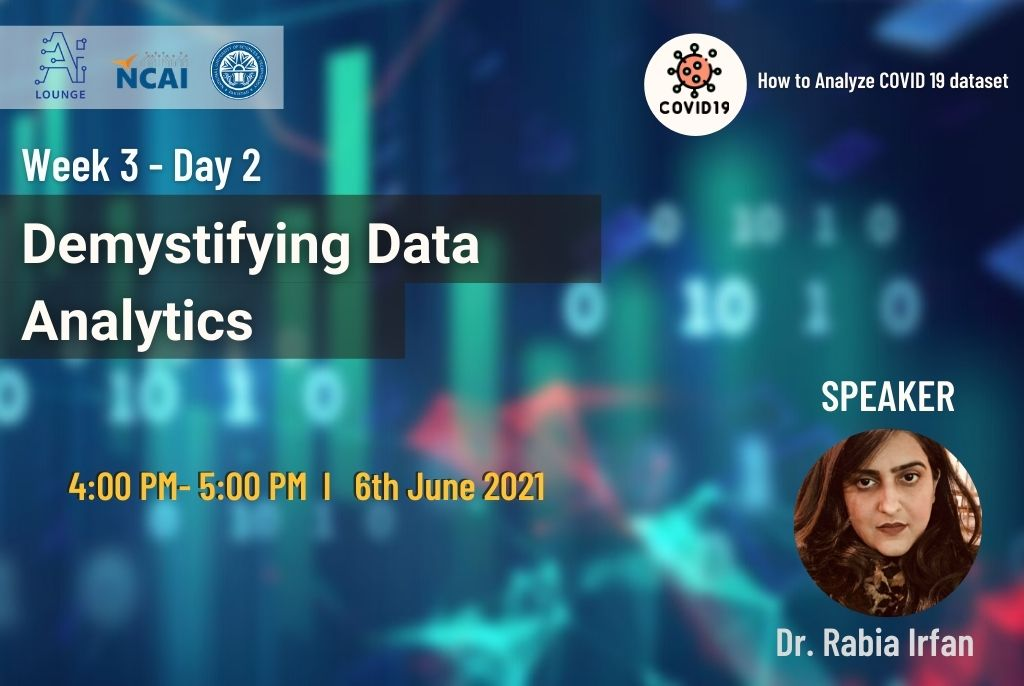

# **PART III - Data Analytics-Advanced Steps (Contd.)**


---

# **1. Course Roadmap**
As per the couse roadmap, the currert status is shown below:
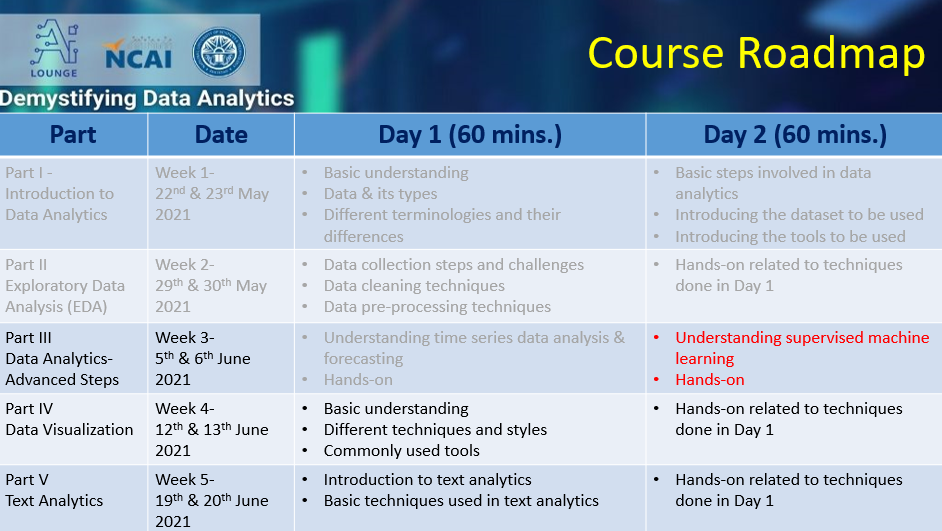

# **2. Week 3 Organization**
The content of Week 3 is divided in the following two parts:


1.   Time Series Analysis & Forecasting - **to be covered in Day 1 (Covered)**
2.   Prediction using supervised machine learning - **to be covered in Day 2**

# **3. Machine Learning (ML)**
Machine learning (ML), is a sub-domain under Artificial Intelligence (AI) comprising of a group of algorithms that try to enable the learning capability of the computers, so that they can learn from the data or past experiences.

Differet tyeps of ML algorithms exist which are suitable for different types of applications as illustrated below:
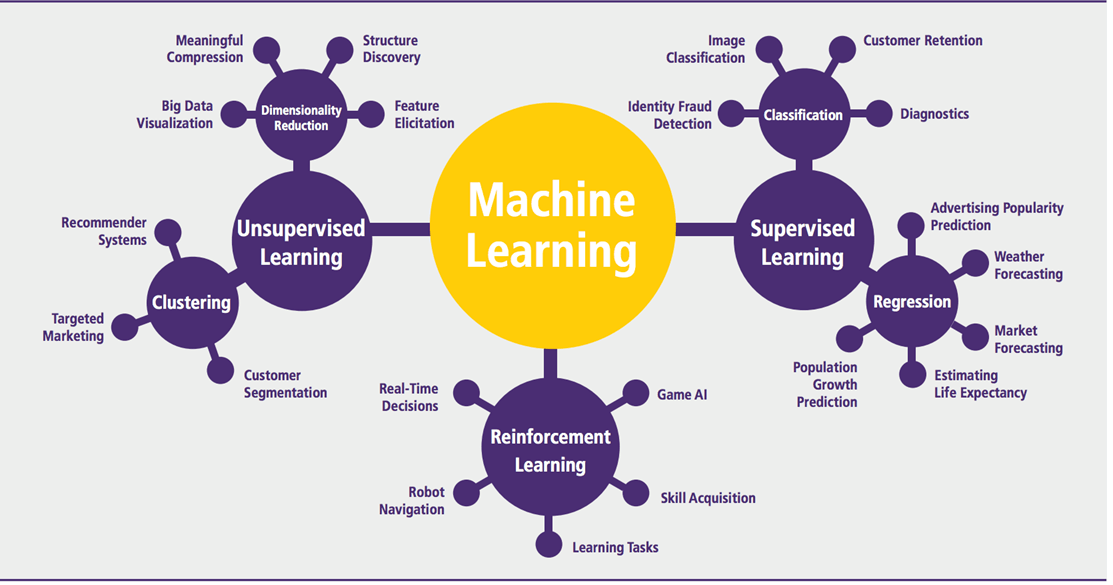

# **3a. Types of ML Algorithms**
ML aglorithms are mainly classified into three types as:

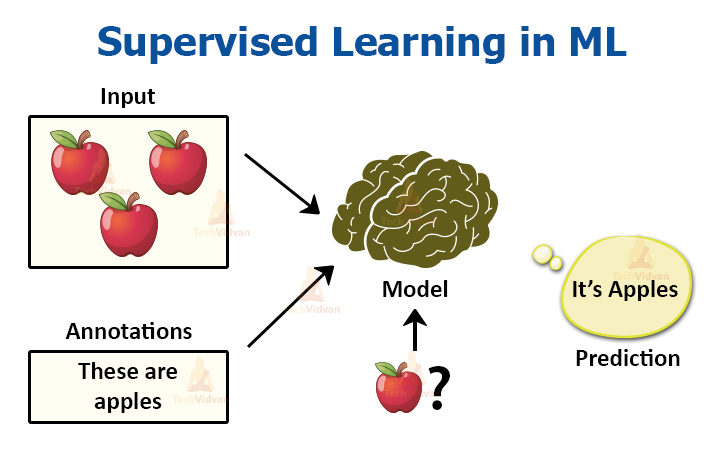


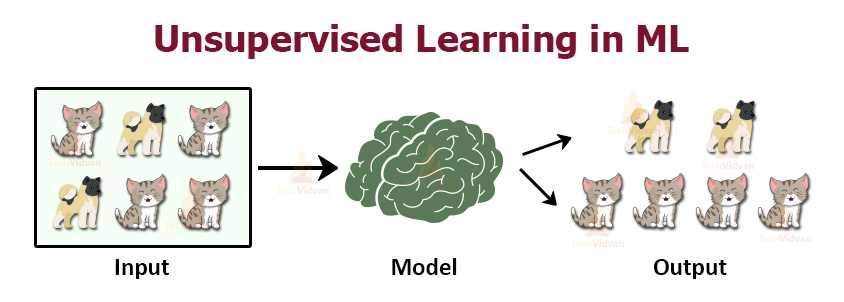


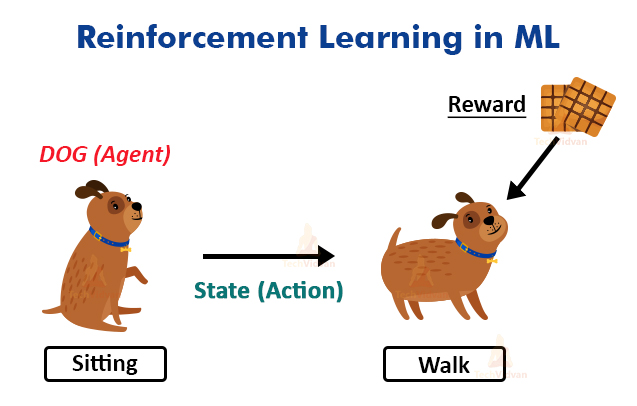






# **3b. Working of ML Model**
A machine learning algorithm works on an idea of using the data for training the machine. In order to test the model, we need a test data as well otherwise, the model efficacy can be calculated and compared with other algorithms.

A general setup for for breaking a dataset looks like this:
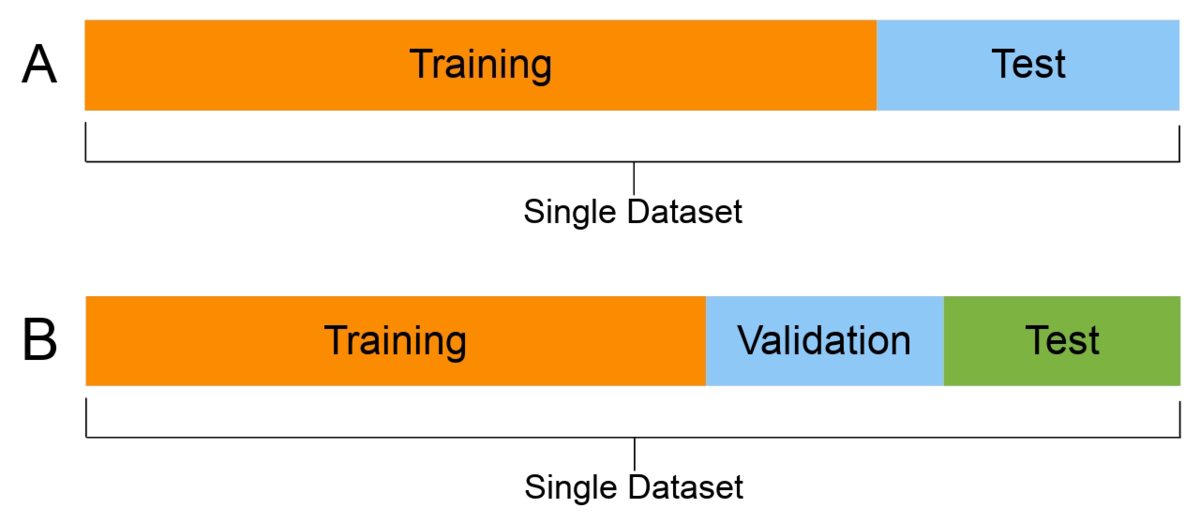

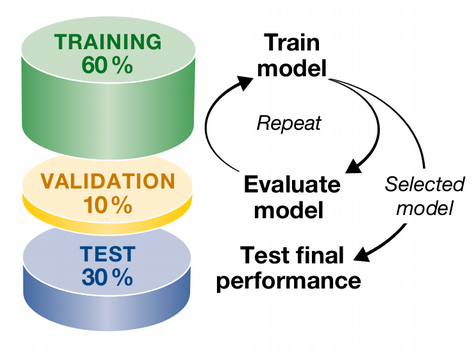

The major components of a ML-based setup looks like this:
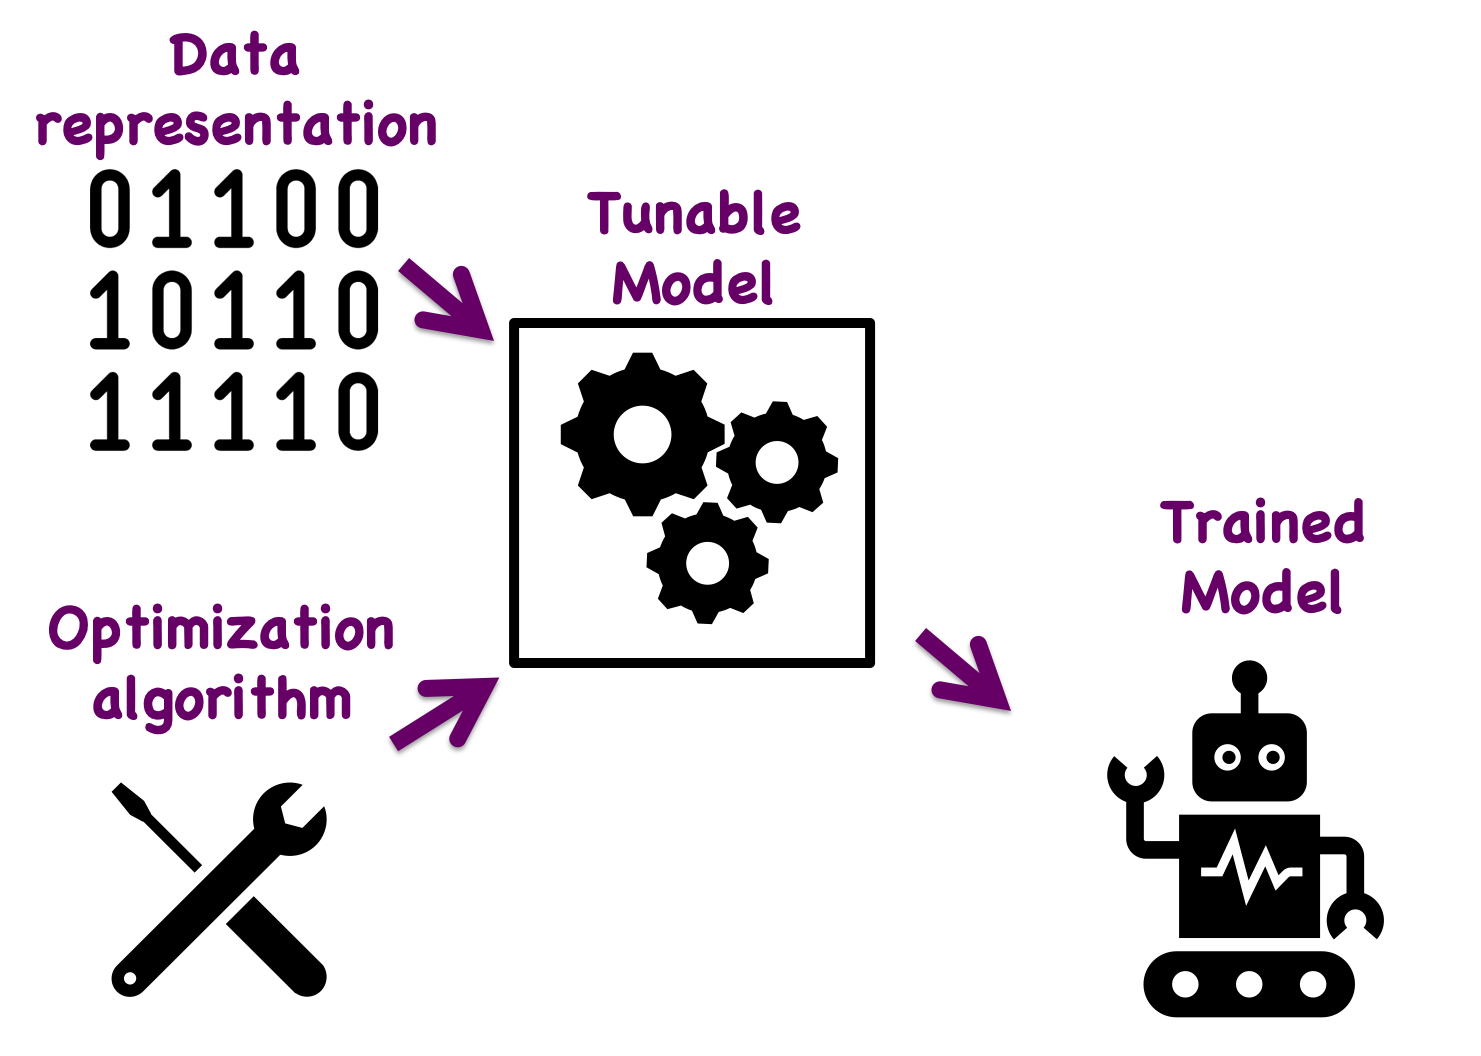



# **3c. Issue in ML Modeling**
The ultimate goal of ML modeling is to develop a model in order to get predictions on New Data or Forecast some events for future on Unseen data. A "Good Model" is not the one that gives accurate predictions on the known data or training data but the one which gives good predictions on the new data and avoids "overfitting" and "underfitting".


1.   **Overfitting:** Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data. Intuitively, overfitting occurs when the model or the algorithm fits the data too well. Such a model is accurate but it is not able to predict outcomes for new cases.
2.   **Underfitting:** nderfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough.
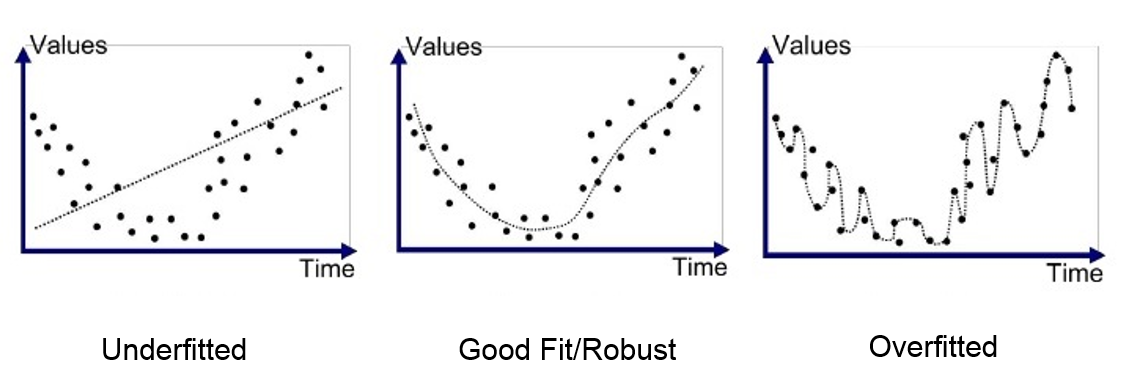

The solution is to perform "Cross--validation".
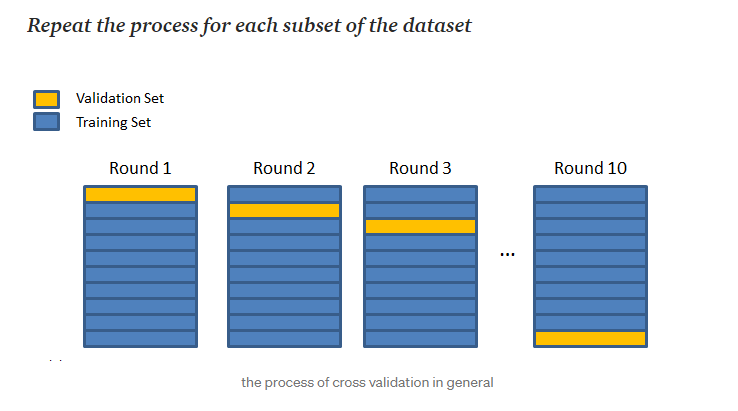

There are different types of cross-validations:
1.   **K-fold Cross Validation**

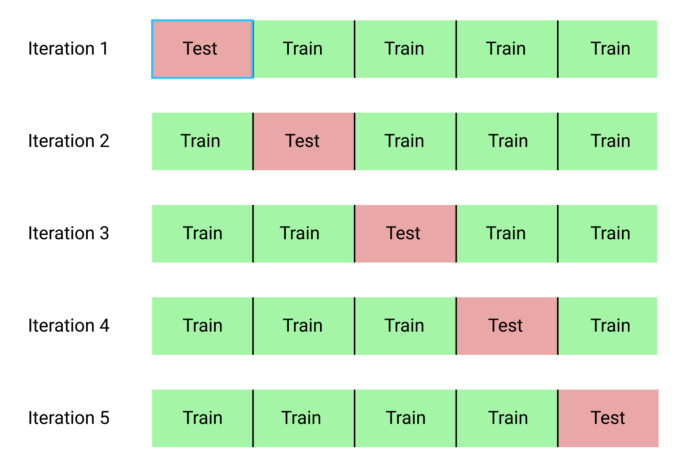
2.   **Stratified K-fold Cross Validation**

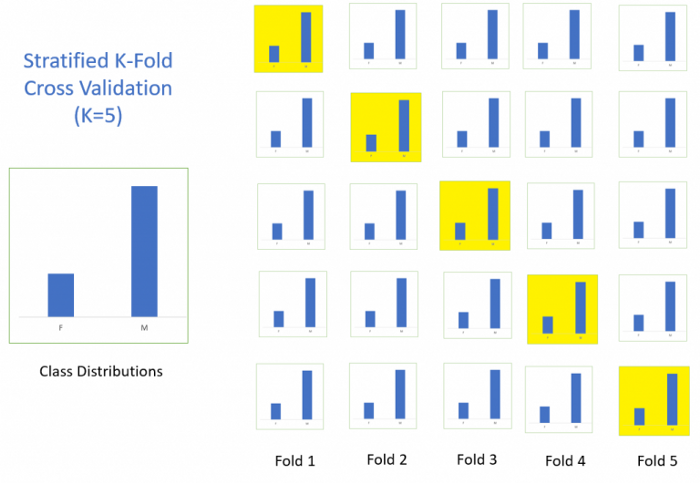
3.   **Leave One Out Cross Validation (LOOCV)**

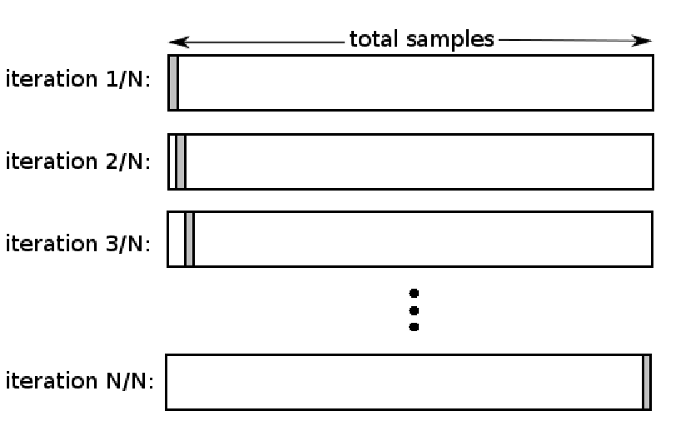

Further details can be seen from the article: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85 


# **5. ML based Prediction - Case Study of COVID-19 Data**
The kind of ML algorithm that can be applied to a dataset depends aminly upon the type of the dataset at hand. An illustration below depicts variety of ML algorithms and the suitability for a particular kind of data:

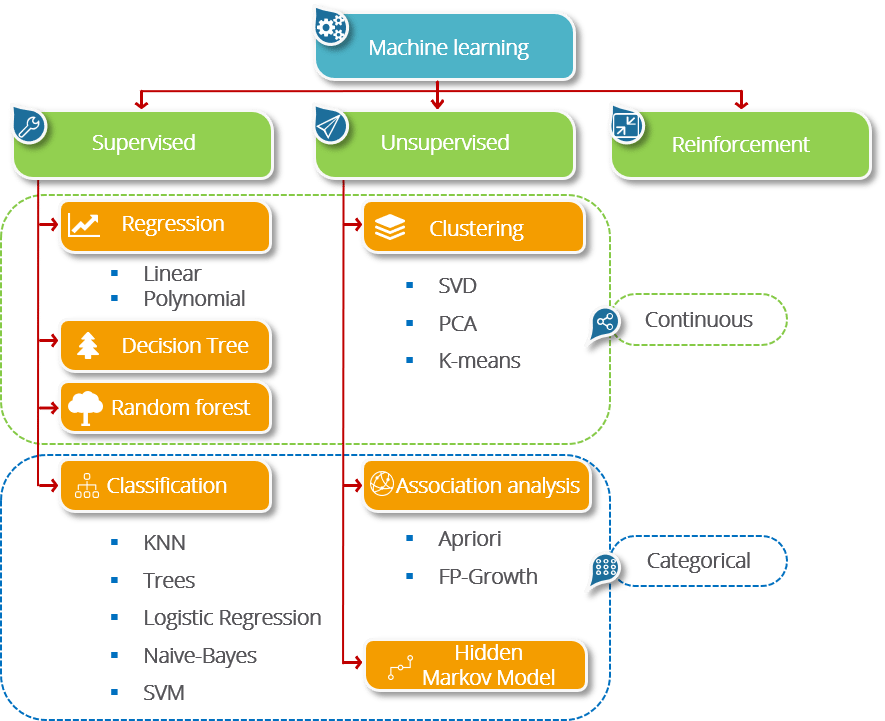

Since the nature of COVID-19 dataset that we have acquired from John Hopkins CSSE is quantative and continuous so Regression-based algorithms (Linear & Polynomial) applicable to such data types would be more suitable to perform for the possible prediction task. 

Illustration of Linear and Polynomial regression is shown below:
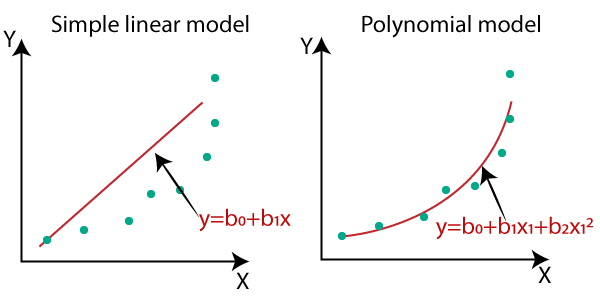

Furthermore, polynomial regression can be of n degrees, illustration below shows the comparison of linear, quadratic and cubic regression for dataset with different spread:

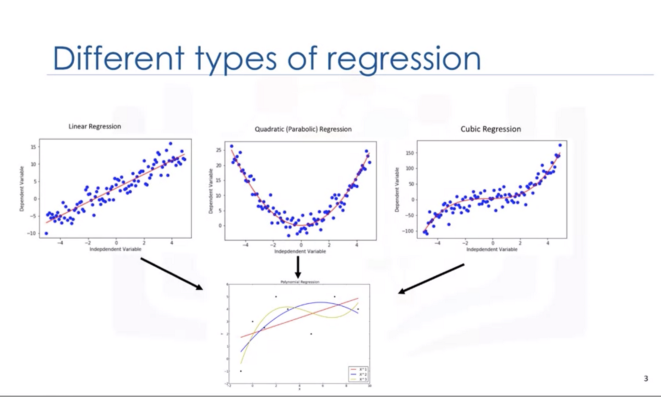




# **5a. Working of Linear Regression Model**
Linear regression works on by learning the best fit line that can produce the least error as depicted below:

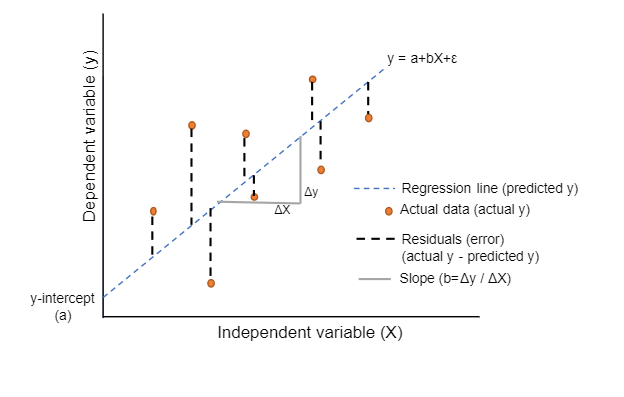


# **5b. Evaluating the ML Model**
Different evaluation metrics exist for different types of ML algorithms as shown below:

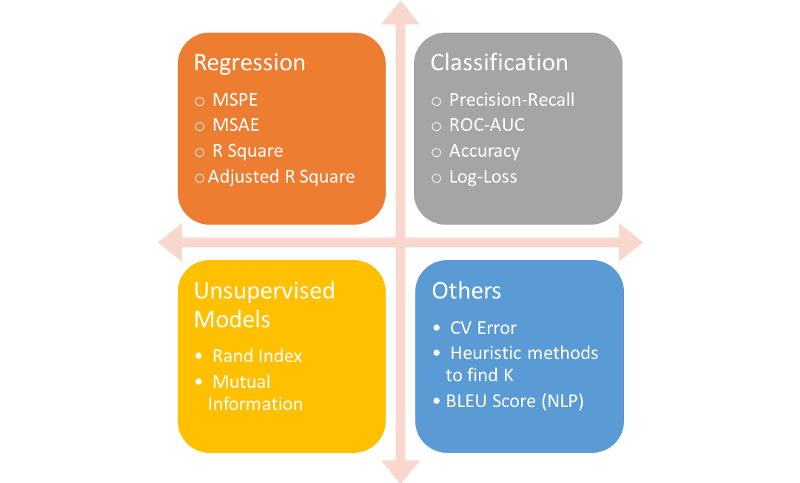

For the case of regression, a very basic error metric is "Mean Absolute Error", the illustration of which is shown below:

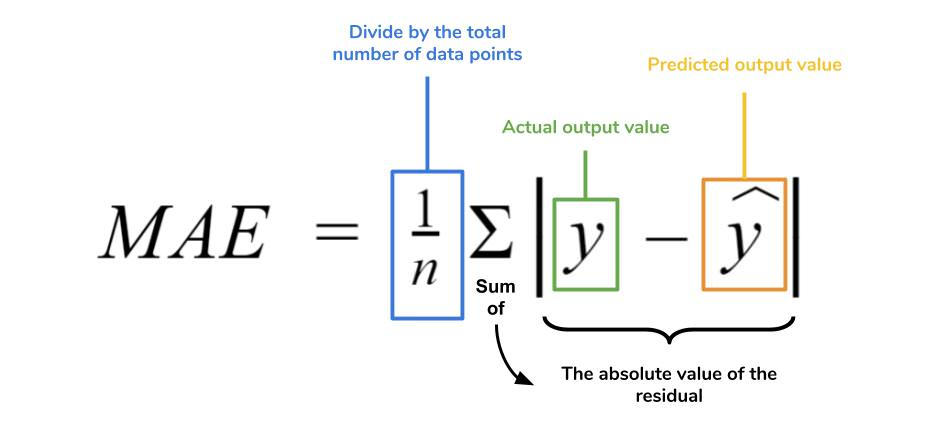

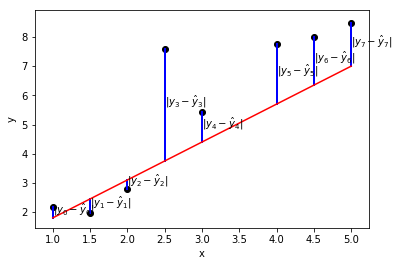

Other metrics also exist:

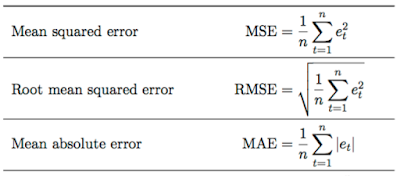

An interesting article to understand the difference between these metrics: https://www.brainstobytes.com/mean-absolute-error-vs-root-mean-square-error/

Now let's apply different form of regression modeling on the COVID-19 dataset that we have!!

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator


%matplotlib inline


In [3]:
complete_clean_data = pd.read_csv('COVID-19-timeseries-clean-complete.csv')
complete_clean_data

,Unnamed: 0,Date,Country/Region,Confirmed,Death,Recovered,Active
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,1,2020-01-22,Albania,0,0,0.0,0.0
2,2,2020-01-22,Algeria,0,0,0.0,0.0
3,3,2020-01-22,Andorra,0,0,0.0,0.0
4,4,2020-01-22,Angola,0,0,0.0,0.0
...,...,...,...,...,...,...,...
100099,100099,2021-06-20,Vietnam,13258,66,5229.0,7963.0
100100,100100,2021-06-20,West Bank and Gaza,312673,3551,306240.0,2882.0
100101,100101,2021-06-20,Yemen,6885,1355,3953.0,1577.0
100102,100102,2021-06-20,Zambia,129033,1644,108960.0,18429.0


In [4]:
#Bringing data in the required format
confirm_pak = complete_clean_data[complete_clean_data['Country/Region']=='Pakistan']
confirm_pak_perday = confirm_pak.groupby("Date")[['Confirmed']].sum().reset_index()
confirm_pak_perday

,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
511,2021-06-16,945184
512,2021-06-17,946227
513,2021-06-18,947218
514,2021-06-19,947218


In [10]:
#Bringing the date in a form suitable for applying regression 
#test by removing reshape to see its affect
days_since_1_22 = np.array([i for i in range(len(confirm_pak_perday.index))]).reshape(-1,1) #quantitative/continuous variable
confirm_pak_cases = np.array(confirm_pak_perday['Confirmed']).reshape(-1,1)

In [11]:
# Adding future rows and prepare a new array with future days adjsuted
days_in_future =15
future_forcast = np.array([i for i in range(len(confirm_pak_perday.index)+days_in_future)]).reshape(-1,1)

In [12]:
#Splitting the x and y axis data into train and test set
X_train_confirmed, X_test_confirmed, Y_train_confirmed, Y_test_confirmed = train_test_split(days_since_1_22, confirm_pak_cases, test_size=0.25, shuffle=False)

In [13]:
#a. Applying LINEAR REGRESSION
#linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model = LinearRegression()
linear_model.fit(X_train_confirmed, Y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, Y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, Y_test_confirmed))

MAE: 114369.66726569817
MSE: 19270900134.905357


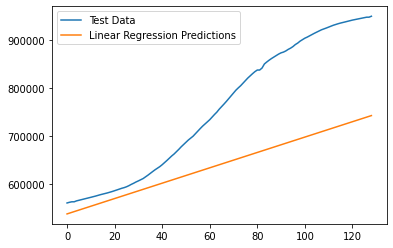

In [14]:
#Plotting to see the error
plt.plot(Y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Linear Regression Predictions'])
plt.show()

In [52]:
#Transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [53]:
#b. Applying POLYNOMIAL REGRESSION
#linear_model_poly = LinearRegression(normalize=True, fit_intercept=False)
linear_model_poly = LinearRegression()
linear_model_poly.fit(poly_X_train_confirmed, Y_train_confirmed)
test_linear_pred_poly = linear_model_poly.predict(poly_X_test_confirmed)
linear_pred_poly = linear_model_poly.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_poly, Y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred_poly, Y_test_confirmed))

MAE: 172724.41618560848
MSE: 43777551873.13799


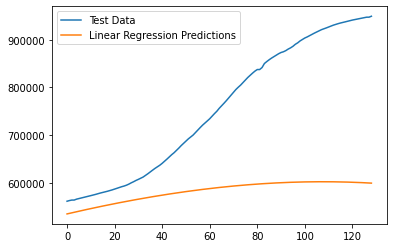

In [54]:
#Plotting to see the error
plt.plot(Y_test_confirmed)
plt.plot(test_linear_pred_poly)
plt.legend(['Test Data', 'Linear Regression Predictions'])
plt.show()

In [19]:
#c. Applying cross validation to LINEAR REGRESSION
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
x= days_since_1_22
y= confirm_pak_cases
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#build multiple linear regression model
model = LinearRegression()
#use k-fold CV to evaluate model
MAE = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv)
MSE = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv)
print('MAE:', np.mean(np.abs(MAE)))
print ('MSE:', np.mean(np.abs(MSE)))

MAE: 49776.84618937983
MSE: 3327997747.3882046


In [20]:
# #Plotting to see the error
# plt.plot(Y_test_confirmed)
# plt.plot(test_linear_pred)
# plt.legend(['Test Data', 'Linear Regression Predictions'])
# plt.show()

In [21]:
#d. Applying cross validation to POLYNOMIAL REGRESSION
#Applying cross validation to LINEAR REGRESSION
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
x= poly.fit_transform(days_since_1_22)
y= confirm_pak_cases
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#build multiple linear regression model
model = LinearRegression()
#use k-fold CV to train, test and evaluate the model
MAE = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv)
MSE = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv)
print('MAE:', np.mean(np.abs(MAE)))
print ('MSE:', np.mean(np.abs(MSE)))

MAE: 30241.059256405948
MSE: 1357780229.6510262


In [ ]:
# Forcasting with Facebook Prophet in train test setup
from fbprophet import Prophet
#Splitting the data into train and test set
confirm_pak_perday.columns = ['ds', 'y'] #Renaming
train_timeseries = confirm_pak_perday[:int(0.75*len(confirm_pak_perday))]
test_timeseries = confirm_pak_perday[int(0.75*len(confirm_pak_perday)):]
#Setting the model parameters
model = Prophet(interval_width=0.95, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True) #significance level = 0.95
model.fit(train_timeseries)
forecast = model.predict(test_timeseries)
forecast
print('MAE:', mean_absolute_error(test_timeseries['y'], forecast['yhat']))
print('MSE:', mean_squared_error(test_timeseries['y'], forecast['yhat']))

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


MAE: 312752.24420259893
MSE: 128396303979.60738


# **8. Conclusion**
--Today we have learnt how to train and test different kind of machine learning models to predict future values.

--You can also evaluate the model based on some metrics to check which model is performing better.

--Regression is a supervised form of learning, there is lot more to explore in ML. May be you can try some other ML algos on COVID-19 dataset by transforming it in some other form.